# A Walkthrough CNN with Keras

## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

## Loading The Data

In [2]:
train = pd.read_csv("../input/digit-recognizer/train.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")

In [3]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1) 

### Check for Null or Missing Values

In [4]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [5]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

### Normalization, Reshaping, Label Encoding

In [6]:
X_train = X_train/255.0
test = test/255.0

X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

## Examining the Training Data

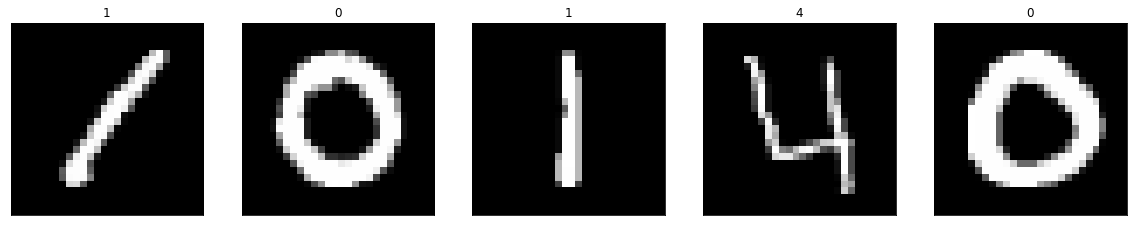

In [7]:
# plotting the first five training images
fig = plt.figure(figsize=(20,20))
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i].reshape(28,28), cmap='gray')
    ax.set_title(str(Y_train[i]))

## Applying One-hot Encoding to Labels

In [8]:
Y_train = np_utils.to_categorical(Y_train, num_classes=10)

# print the first five encoded training labels
print('One-hot Encoded labels:')
print(Y_train[:10])

One-hot Encoded labels:
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


### Splitting the Data

In [9]:
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)
print(X_train.shape, Y_train.shape)

(37800, 28, 28, 1) (37800, 10)


## The Model

In [10]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=192, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=192, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
reduce_lr = ReduceLROnPlateau(monitor='loss',
                              factor=0.3, 
                              verbose=1,
                              patience=2, 
                              min_lr=0.00000001)

hist = model.fit(X_train, 
                 Y_train, 
                 batch_size=100, 
                 epochs=30,
                 validation_data=(X_val, Y_val), 
                 callbacks=[reduce_lr],
                 verbose=1, 
                 shuffle=True)

Train on 37800 samples, validate on 4200 samples
Epoch 1/30
37800/37800 [==============================] - 12s 314us/step - loss: 0.2097 - acc: 0.9319 - val_loss: 0.0428 - val_acc: 0.9876
Epoch 2/30
37800/37800 [==============================] - 9s 225us/step - loss: 0.0568 - acc: 0.9837 - val_loss: 0.0388 - val_acc: 0.9900
Epoch 3/30
37800/37800 [==============================] - 9s 225us/step - loss: 0.0397 - acc: 0.9890 - val_loss: 0.0372 - val_acc: 0.9895
Epoch 4/30
37800/37800 [==============================] - 9s 225us/step - loss: 0.0298 - acc: 0.9911 - val_loss: 0.0297 - val_acc: 0.9926
Epoch 5/30
37800/37800 [==============================] - 8s 225us/step - loss: 0.0226 - acc: 0.9937 - val_loss: 0.0328 - val_acc: 0.9929
Epoch 6/30
37800/37800 [==============================] - 9s 226us/step - loss: 0.0210 - acc: 0.9939 - val_loss: 0.0326 - val_acc: 0.9919
Epoch 7/30
37800/37800 [==============================] - 8s 224us/step - loss: 0.0177 - acc: 0.9950 - val_loss: 0.0574 - 

In [13]:
Y_test = model.predict_classes(test, verbose=2)

In [14]:
submission = pd.read_csv('../input/digit-recognizer/sample_submission.csv')
submission['Label'] = Y_test
submission.to_csv('submission.csv',index=False)